In [1]:
import plotly.graph_objects as go 
import numpy as np 
import plotly.express as px

### Working with Plotly Go

In [2]:
#  import datasets 

iris = px.data.iris()
tips = px.data.tips()
gap = px.data.gapminder()

In [3]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [4]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [5]:
gap.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [6]:
# scatter plot using plotly go 

temp_df = gap[gap['year'] == 2007]

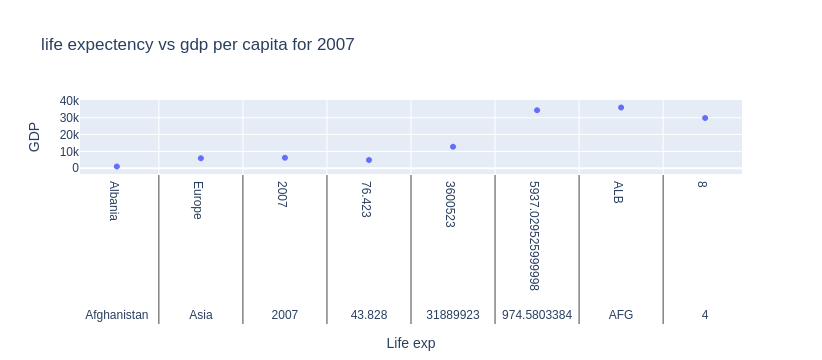

In [7]:
trace1 = go.Scatter(x=temp_df, y=temp_df['gdpPercap'], mode='markers')
data = [trace1]

layout = go.Layout(title = 'life expectency vs gdp per capita for 2007', xaxis={'title':'Life exp'}, yaxis={'title':'GDP'})
fig = go.Figure(data, layout)

fig.show()

**We'll use plotly express instead of go. yey !**

In [8]:
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

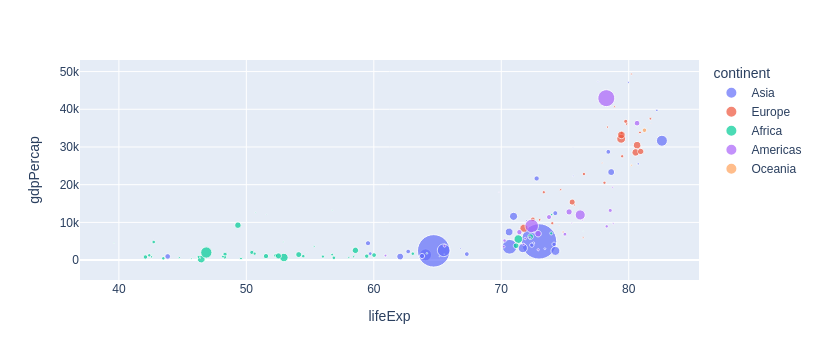

In [9]:
px.scatter(temp_df, x='lifeExp', y='gdpPercap', color='continent', size='pop', size_max=25, hover_name='country')

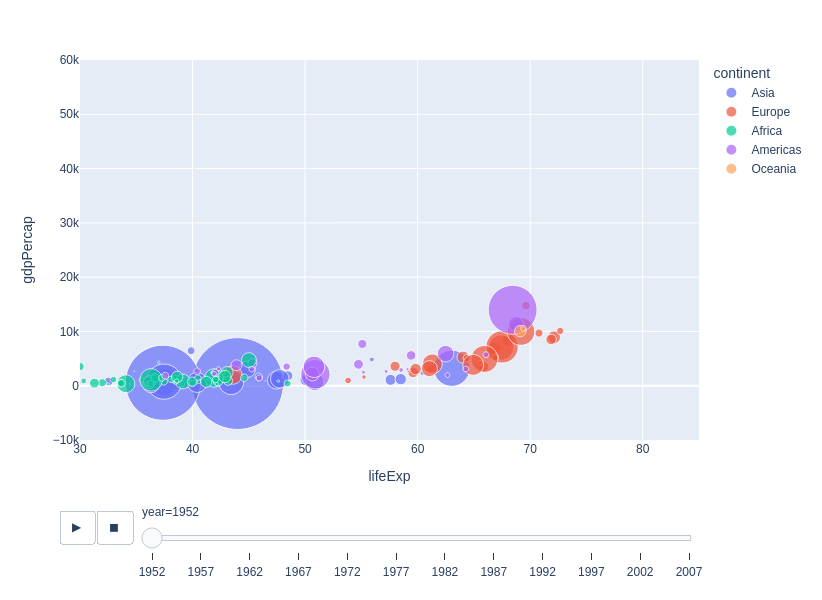

In [10]:
px.scatter(gap, x='lifeExp', y='gdpPercap', color='continent', size='pop', size_max=100, 
           hover_name='country', animation_frame='year', animation_group='country', 
           range_x=[30,85], range_y=[-10000, 60000], width=900, height=600)

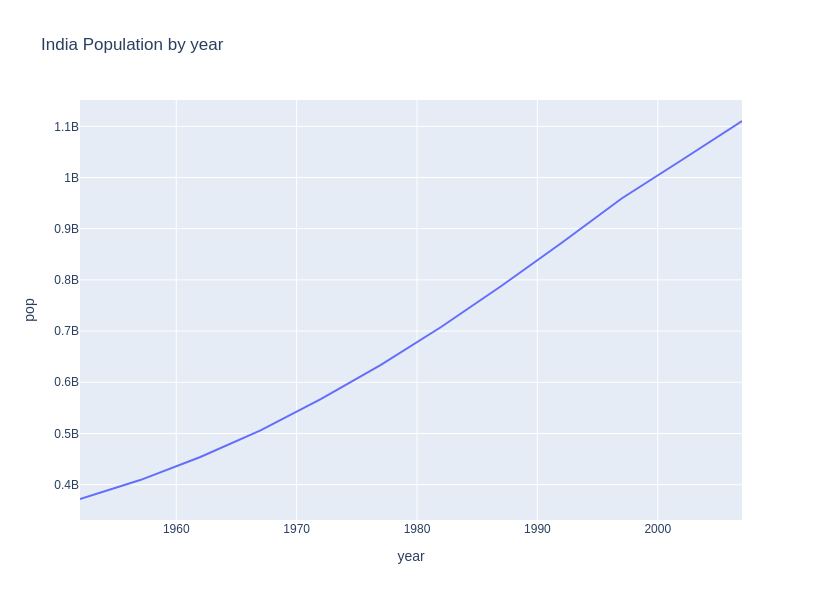

In [11]:
temp_df = gap[gap['country'] == 'India']

px.line(temp_df, x='year', y='pop', title='India Population by year', width=800, height=600)

In [12]:
temp_df = gap[gap['country'].isin(['India', 'China', 'Pakistan'])].pivot(index='year', columns='country', values='lifeExp')

In [13]:
temp_df

country     China   India  Pakistan
year                               
1952     44.00000  37.373    43.436
1957     50.54896  40.249    45.557
1962     44.50136  43.605    47.670
1967     58.38112  47.193    49.800
1972     63.11888  50.651    51.929
1977     63.96736  54.208    54.043
1982     65.52500  56.596    56.158
1987     67.27400  58.553    58.245
1992     68.69000  60.223    60.838
1997     70.42600  61.765    61.818
2002     72.02800  62.879    63.610
2007     72.96100  64.698    65.483

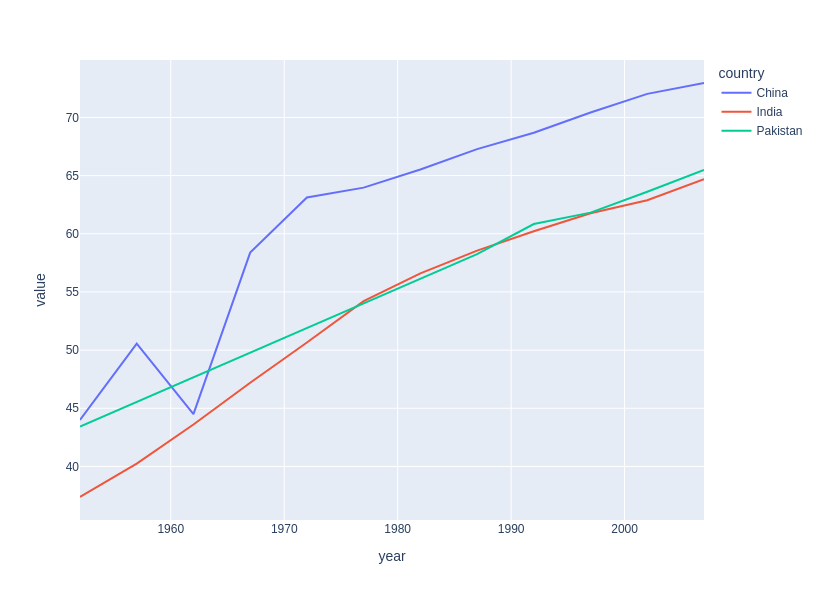

In [14]:
px.line(temp_df, x=temp_df.index, y=temp_df.columns, width=800, height=600)

In [15]:
# bar chart
temp_df = gap[gap['country'] == 'India']
temp_df

country continent  year  lifeExp         pop    gdpPercap iso_alpha  \
696   India      Asia  1952   37.373   372000000   546.565749       IND   
697   India      Asia  1957   40.249   409000000   590.061996       IND   
698   India      Asia  1962   43.605   454000000   658.347151       IND   
699   India      Asia  1967   47.193   506000000   700.770611       IND   
700   India      Asia  1972   50.651   567000000   724.032527       IND   
701   India      Asia  1977   54.208   634000000   813.337323       IND   
702   India      Asia  1982   56.596   708000000   855.723538       IND   
703   India      Asia  1987   58.553   788000000   976.512676       IND   
704   India      Asia  1992   60.223   872000000  1164.406809       IND   
705   India      Asia  1997   61.765   959000000  1458.817442       IND   
706   India      Asia  2002   62.879  1034172547  1746.769454       IND   
707   India      Asia  2007   64.698  1110396331  2452.210407       IND   

     iso_num  
696      356  
697      356  
698      356  
699      356  
700      356  
701      356  
702      356  
703      356  
704      356  
705      356  
706      356  
707      356

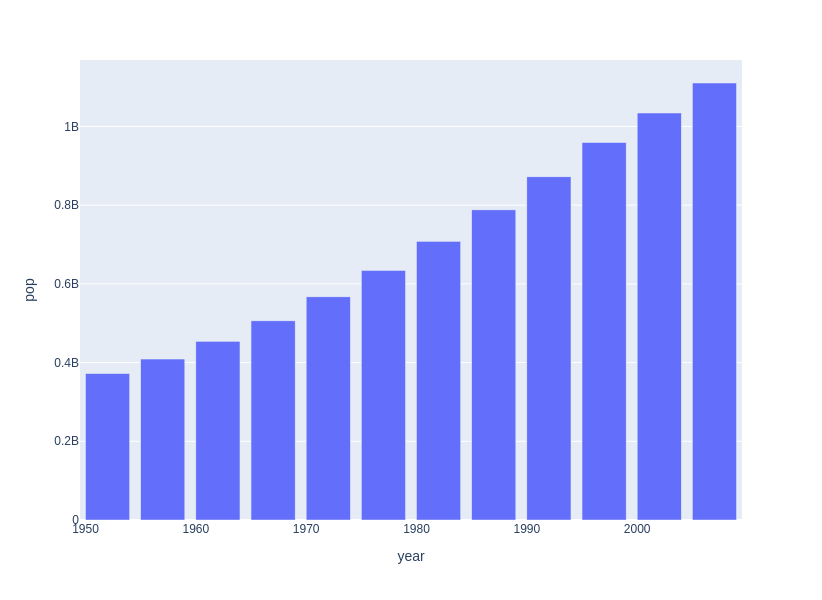

In [16]:
px.bar(temp_df, x='year', y='pop', width=800, height=600)

In [17]:
# grouped bar char 
temp_df = gap[gap['country'].isin(['India', 'China', 'Pakistan'])].pivot(index='year', columns='country', values='gdpPercap')
temp_df

country        China        India     Pakistan
year                                          
1952      400.448611   546.565749   684.597144
1957      575.987001   590.061996   747.083529
1962      487.674018   658.347151   803.342742
1967      612.705693   700.770611   942.408259
1972      676.900092   724.032527  1049.938981
1977      741.237470   813.337323  1175.921193
1982      962.421381   855.723538  1443.429832
1987     1378.904018   976.512676  1704.686583
1992     1655.784158  1164.406809  1971.829464
1997     2289.234136  1458.817442  2049.350521
2002     3119.280896  1746.769454  2092.712441
2007     4959.114854  2452.210407  2605.947580

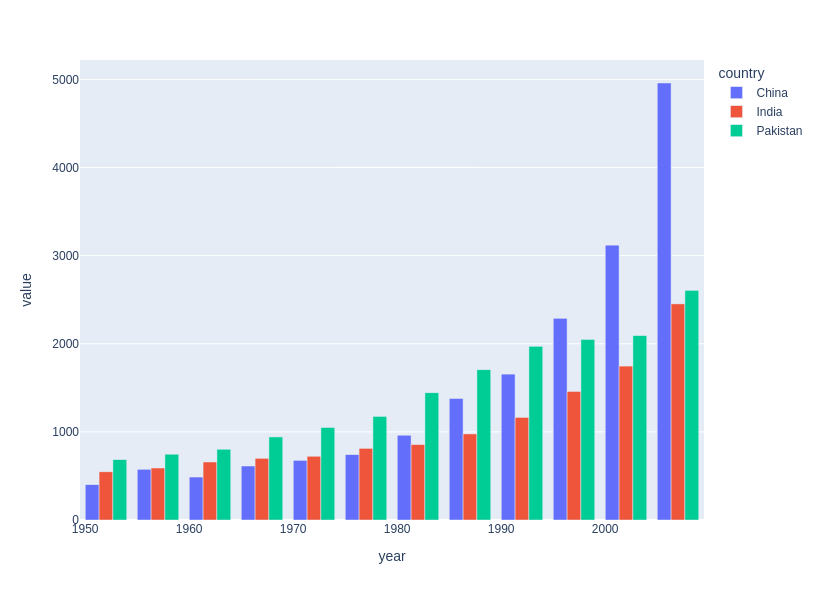

In [18]:
px.bar(temp_df, x=temp_df.index, y=temp_df.columns, barmode='group', width=800, height=600)

In [19]:
# grouped bar char logged
temp_df = gap[gap['country'].isin(['India', 'China', 'Pakistan'])].pivot(index='year', columns='country', values='gdpPercap')
temp_df

country        China        India     Pakistan
year                                          
1952      400.448611   546.565749   684.597144
1957      575.987001   590.061996   747.083529
1962      487.674018   658.347151   803.342742
1967      612.705693   700.770611   942.408259
1972      676.900092   724.032527  1049.938981
1977      741.237470   813.337323  1175.921193
1982      962.421381   855.723538  1443.429832
1987     1378.904018   976.512676  1704.686583
1992     1655.784158  1164.406809  1971.829464
1997     2289.234136  1458.817442  2049.350521
2002     3119.280896  1746.769454  2092.712441
2007     4959.114854  2452.210407  2605.947580

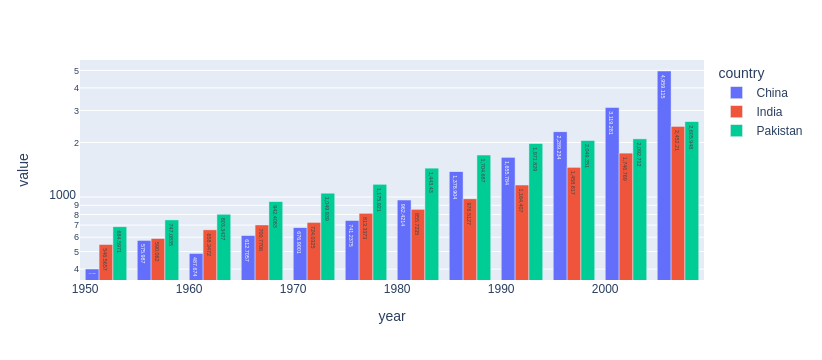

In [20]:
px.bar(temp_df, x=temp_df.index, y=temp_df.columns, barmode='group', log_y=True, text_auto=True)

In [21]:
# Stacked bar chart 
# pop contribution per country to a continents pop stacked for a particular year(2007)
temp_df = gap[gap['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

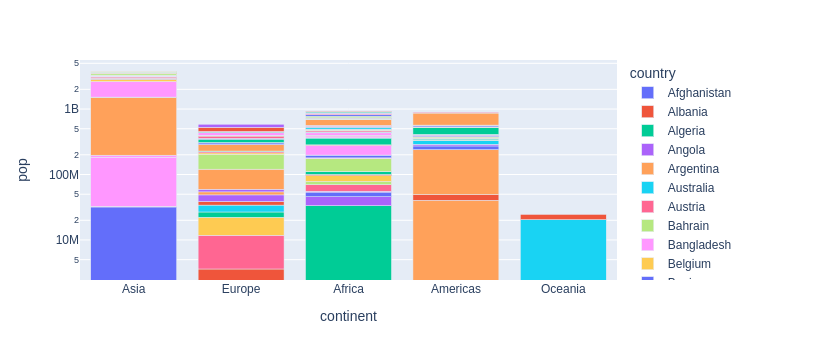

In [22]:
px.bar(temp_df, x='continent', y='pop', color='country', log_y=True)

In [23]:
# bar chart animation 
gap

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

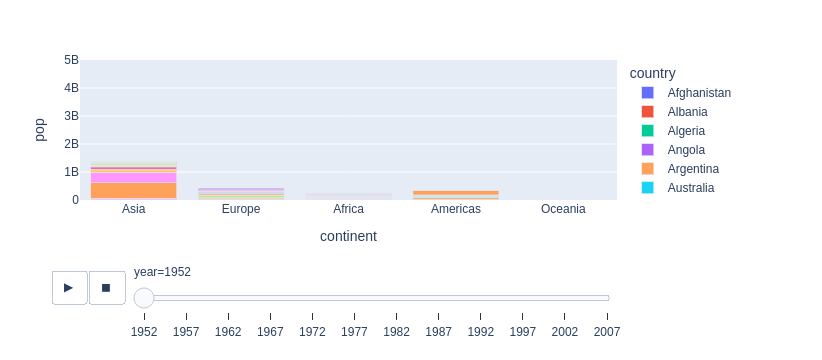

In [24]:
px.bar(gap, x='continent', y='pop', color='country', animation_frame='year', animation_group='country', range_y=[1, 5000000000])

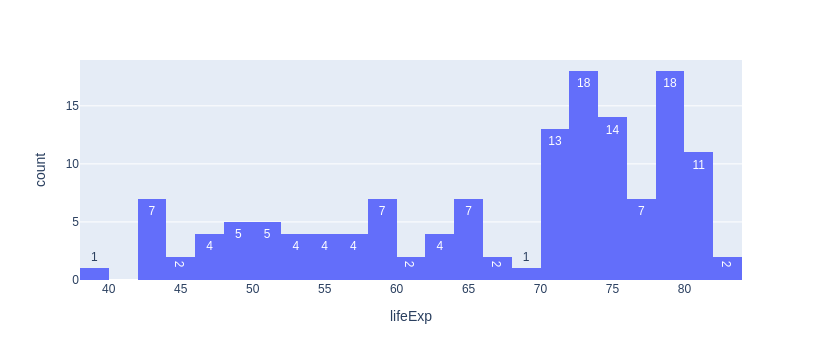

In [25]:
# histogram 
# plot histogram of life expt of all countries in 2007 -> nbins -> text_auto 
temp_df = gap[gap['year'] == 2007]

px.histogram(temp_df, x='lifeExp', nbins=40, text_auto=True)

In [26]:
# plot sepal length of all iris species
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

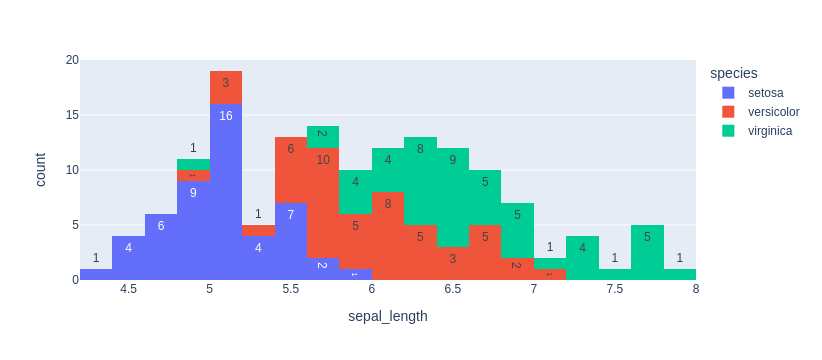

In [27]:
px.histogram(iris, x='sepal_length', color='species', nbins=30, text_auto=True)

In [28]:
# pie chart 
# population of europe by countries in 2007 
temp_df = gap[(gap['year'] == 2007) & (gap['continent'] == 'Europe')]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
23                   Albania    Europe  2007   76.423   3600523   5937.029526   
83                   Austria    Europe  2007   79.829   8199783  36126.492700   
119                  Belgium    Europe  2007   79.441  10392226  33692.605080   
155   Bosnia and Herzegovina    Europe  2007   74.852   4552198   7446.298803   
191                 Bulgaria    Europe  2007   73.005   7322858  10680.792820   
383                  Croatia    Europe  2007   75.748   4493312  14619.222720   
407           Czech Republic    Europe  2007   76.486  10228744  22833.308510   
419                  Denmark    Europe  2007   78.332   5468120  35278.418740   
527                  Finland    Europe  2007   79.313   5238460  33207.084400   
539                   France    Europe  2007   80.657  61083916  30470.016700   
575                  Germany    Europe  2007   79.406  82400996  32170.374420   
599                   Greece    Europe  2007   79.483  10706290  27538.411880   
683                  Hungary    Europe  2007   73.338   9956108  18008.944440   
695                  Iceland    Europe  2007   81.757    301931  36180.789190   
755                  Ireland    Europe  2007   78.885   4109086  40675.996350   
779                    Italy    Europe  2007   80.546  58147733  28569.719700   
1019              Montenegro    Europe  2007   74.543    684736   9253.896111   
1091             Netherlands    Europe  2007   79.762  16570613  36797.933320   
1151                  Norway    Europe  2007   80.196   4627926  49357.190170   
1235                  Poland    Europe  2007   75.563  38518241  15389.924680   
1247                Portugal    Europe  2007   78.098  10642836  20509.647770   
1283                 Romania    Europe  2007   72.476  22276056  10808.475610   
1343                  Serbia    Europe  2007   74.002  10150265   9786.534714   
1379         Slovak Republic    Europe  2007   74.663   5447502  18678.314350   
1391                Slovenia    Europe  2007   77.926   2009245  25768.257590   
1427                   Spain    Europe  2007   80.941  40448191  28821.063700   
1475                  Sweden    Europe  2007   80.884   9031088  33859.748350   
1487             Switzerland    Europe  2007   81.701   7554661  37506.419070   
1583                  Turkey    Europe  2007   71.777  71158647   8458.276384   
1607          United Kingdom    Europe  2007   79.425  60776238  33203.261280   

     iso_alpha  iso_num  
23         ALB        8  
83         AUT       40  
119        BEL       56  
155        BIH       70  
191        BGR      100  
383        HRV      191  
407        CZE      203  
419        DNK      208  
527        FIN      246  
539        FRA      250  
575        DEU      276  
599        GRC      300  
683        HUN      348  
695        ISL      352  
755        IRL      372  
779        ITA      380  
1019       MNE      499  
1091       NLD      528  
1151       NOR      578  
1235       POL      616  
1247       PRT      620  
1283       ROU      642  
1343       SRB      688  
1379       SVK      703  
1391       SVN      705  
1427       ESP      724  
1475       SWE      752  
1487       CHE      756  
1583       TUR      792  
1607       GBR      826

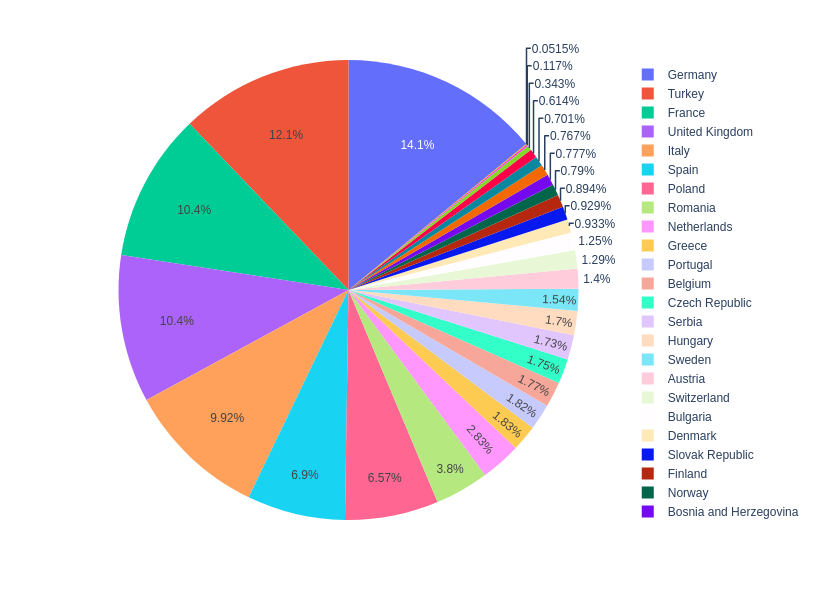

In [29]:
px.pie(temp_df, values='pop', names='country', width=800, height=600)

In [30]:
# pull or explode 
temp_df = gap[gap['year'] == 2007].groupby('continent')['pop'].sum().reset_index()
temp_df

continent         pop
0    Africa   929539692
1  Americas   898871184
2      Asia  3811953827
3    Europe   586098529
4   Oceania    24549947

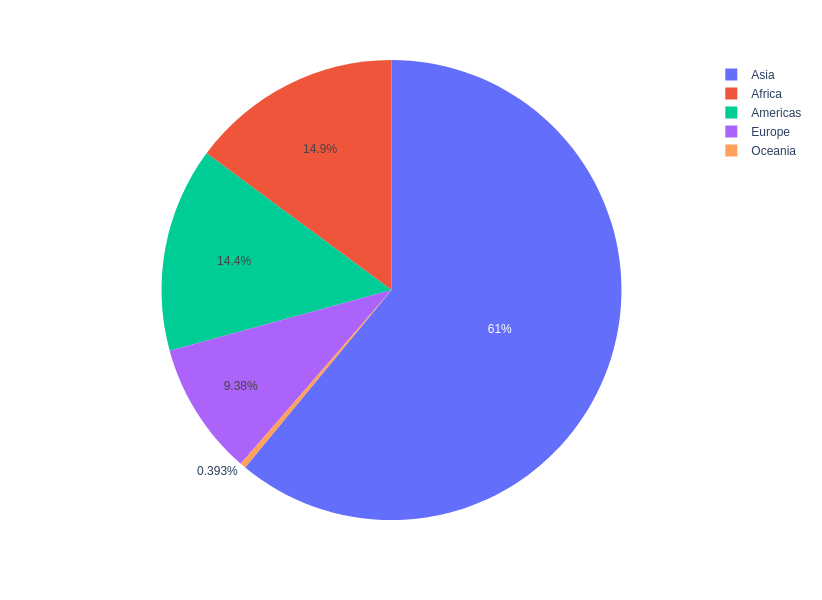

In [31]:
px.pie(temp_df, values='pop', names='continent', width=800, height=600 )

In [32]:
# Sunburst plot -> Sunburst plots visualize hierarchical data spanning outward radially from root to leaves -> color 
# path -> [], values 
temp_df = gap[gap['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

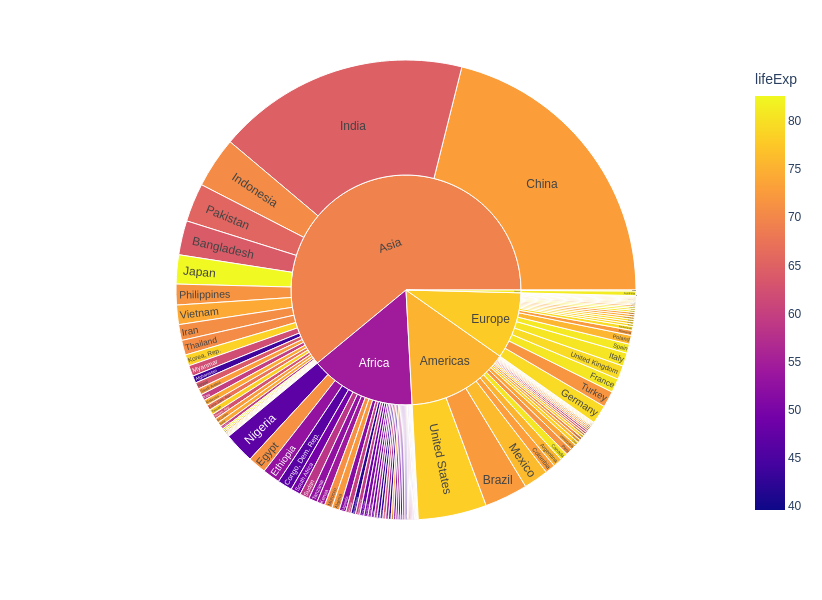

In [33]:
px.sunburst(temp_df, path=['continent', 'country'], values='pop', color='lifeExp', width=800, height=600)

In [34]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

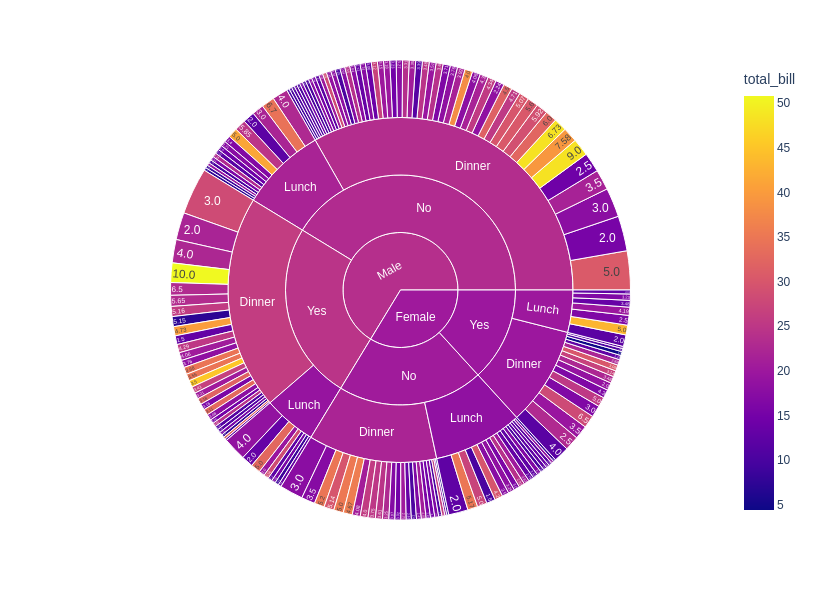

In [35]:
px.sunburst(tips, path=['sex', 'smoker', 'time', 'tip'], values='tip', color='total_bill', width=800, height=600)

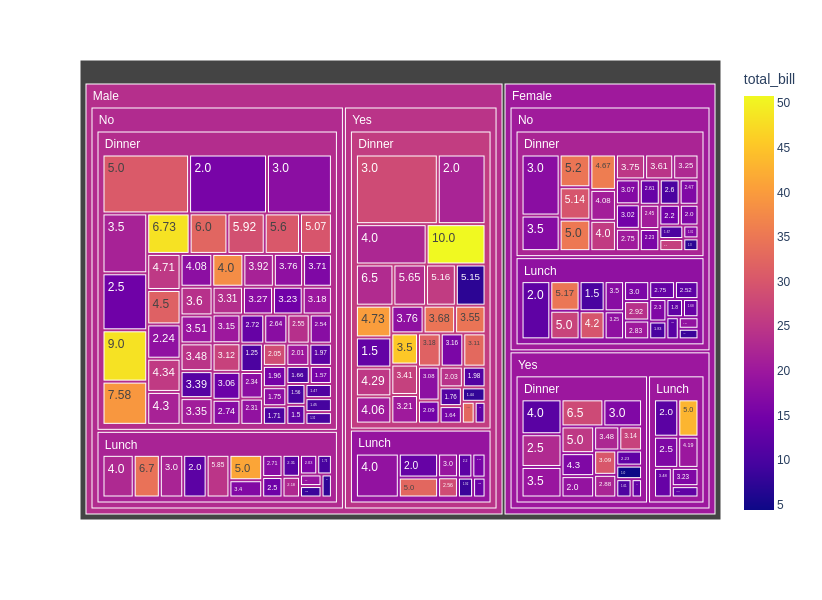

In [36]:
# treemap
px.treemap(tips, path=['sex', 'smoker', 'time', 'tip'], values='tip', color='total_bill', width=800, height=600)

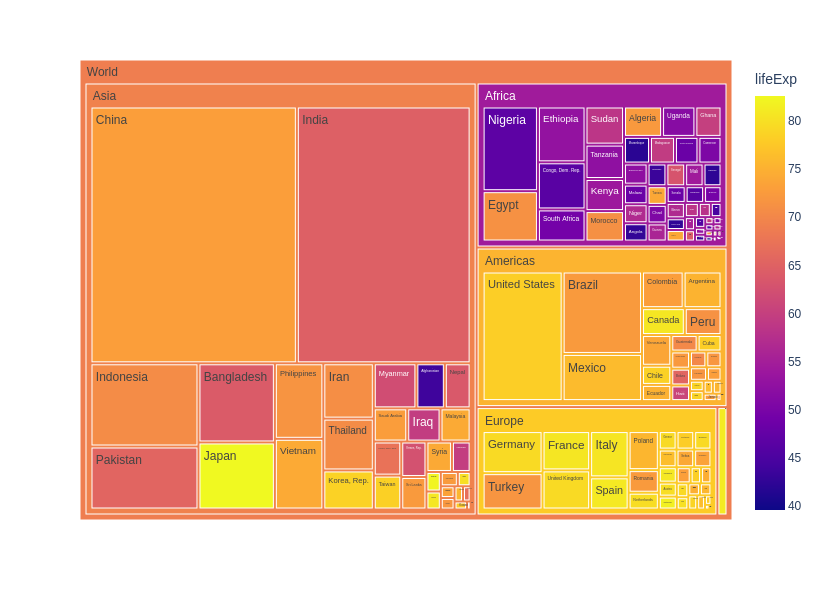

In [37]:
temp_df = gap[gap['year'] == 2007]

px.treemap(temp_df, path=[px.Constant('World'), 'continent', 'country'], values='pop', color='lifeExp', width=800, height=600)

In [38]:
# heatmap  -> find heatmap of all continent with year on avg life exp 

temp_df = gap.pivot_table(index='year', columns='continent', values='lifeExp', aggfunc='mean')
temp_df

continent     Africa  Americas       Asia     Europe  Oceania
year                                                         
1952       39.135500  53.27984  46.314394  64.408500  69.2550
1957       41.266346  55.96028  49.318544  66.703067  70.2950
1962       43.319442  58.39876  51.563223  68.539233  71.0850
1967       45.334538  60.41092  54.663640  69.737600  71.3100
1972       47.450942  62.39492  57.319269  70.775033  71.9100
1977       49.580423  64.39156  59.610556  71.937767  72.8550
1982       51.592865  66.22884  62.617939  72.806400  74.2900
1987       53.344788  68.09072  64.851182  73.642167  75.3200
1992       53.629577  69.56836  66.537212  74.440100  76.9450
1997       53.598269  71.15048  68.020515  75.505167  78.1900
2002       53.325231  72.42204  69.233879  76.700600  79.7400
2007       54.806038  73.60812  70.728485  77.648600  80.7195

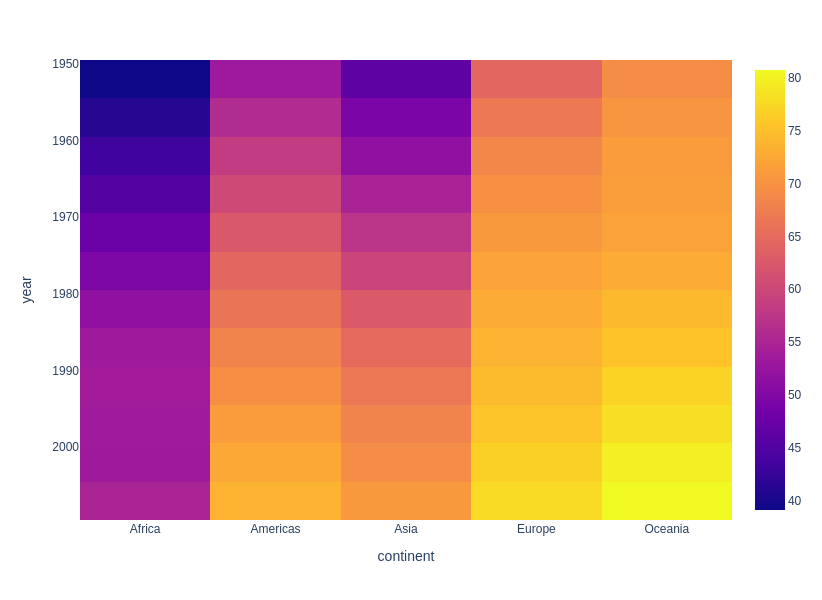

In [39]:
px.imshow(temp_df, width=800, height=600)

In [40]:
# 3d scatter 
# plot a 3d scatter plot of all country data for 2007 
temp_df = gap[gap['year'] == 2007]
temp_df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

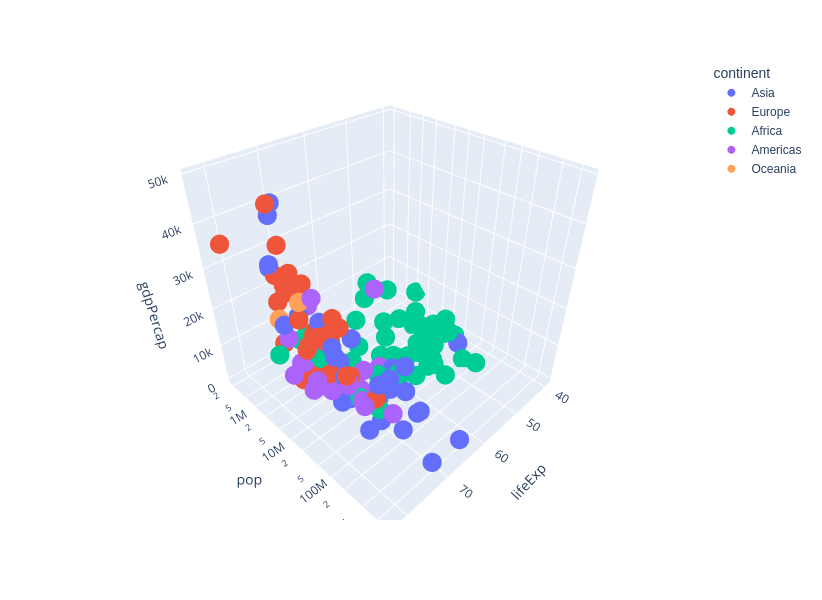

In [41]:
px.scatter_3d(temp_df, x='lifeExp', y='pop', z='gdpPercap', color='continent', hover_name='country', width=800, height=600, log_y=True)

In [42]:
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

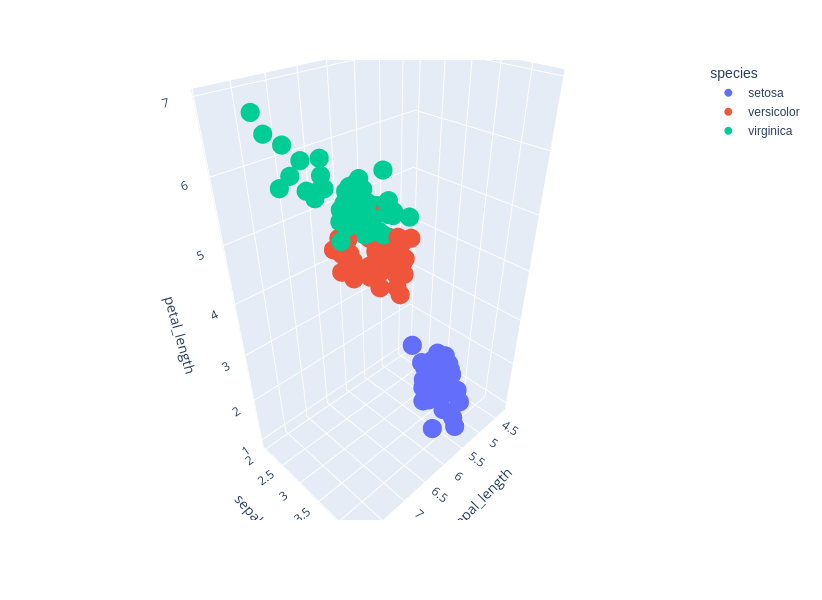

In [43]:
px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_length', color='species', width=800, height=600)

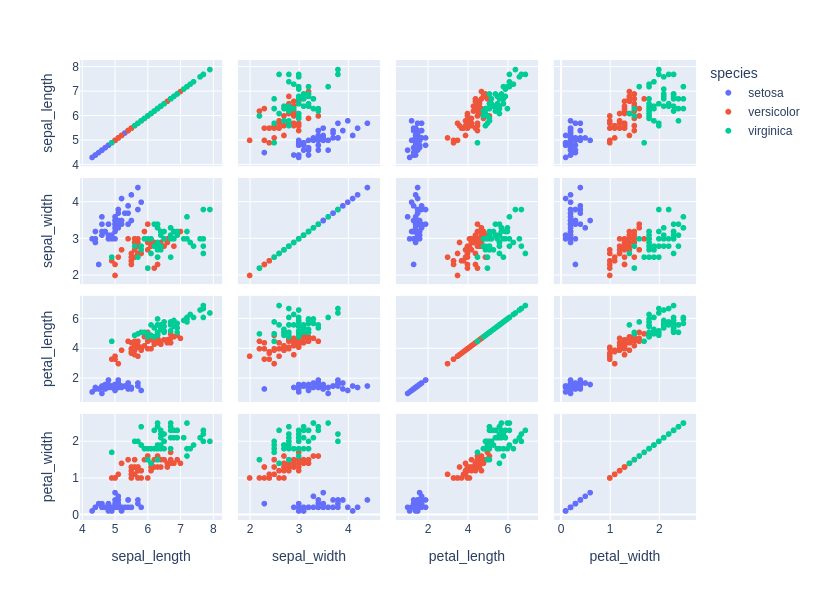

In [44]:
# scatter_matrix -> dimensions
px.scatter_matrix(iris, dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], color='species', width=800, height=600)

In [45]:
import plotly.graph_objects as go
import plotly.express as px 
import numpy as np

In [46]:
# facet plot 

tips = px.data.tips()
gap = px.data.gapminder()

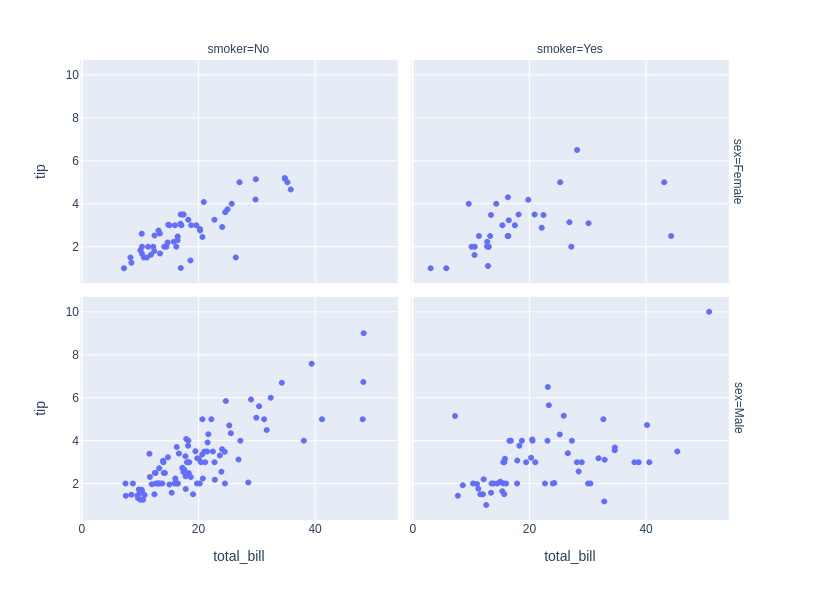

In [47]:
px.scatter(tips, x='total_bill', y='tip', facet_col='smoker', facet_row='sex', width=800, height=600)

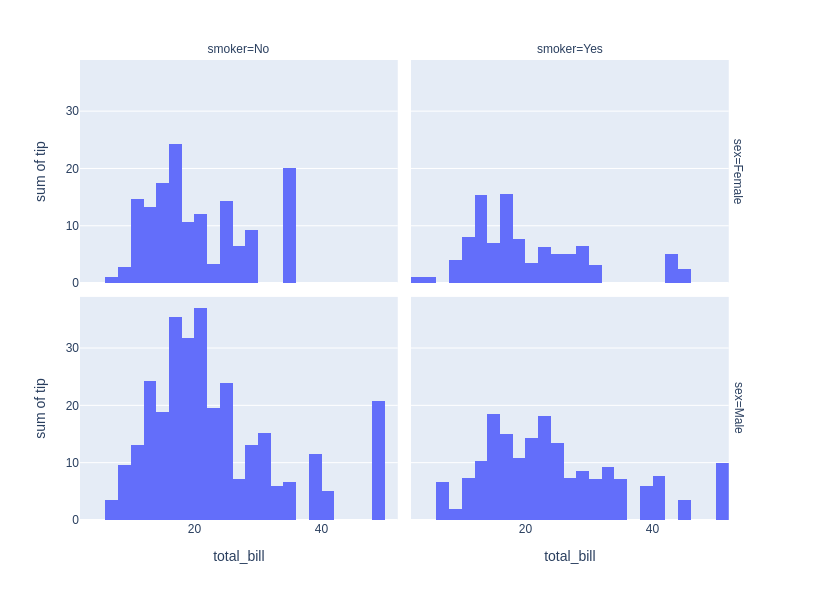

In [48]:
px.histogram(tips, x='total_bill', y='tip', facet_col='smoker', facet_row='sex', width=800, height=600)

In [49]:
temp_df = gap[gap['country'] == 'India']
temp_df

country continent  year  lifeExp         pop    gdpPercap iso_alpha  \
696   India      Asia  1952   37.373   372000000   546.565749       IND   
697   India      Asia  1957   40.249   409000000   590.061996       IND   
698   India      Asia  1962   43.605   454000000   658.347151       IND   
699   India      Asia  1967   47.193   506000000   700.770611       IND   
700   India      Asia  1972   50.651   567000000   724.032527       IND   
701   India      Asia  1977   54.208   634000000   813.337323       IND   
702   India      Asia  1982   56.596   708000000   855.723538       IND   
703   India      Asia  1987   58.553   788000000   976.512676       IND   
704   India      Asia  1992   60.223   872000000  1164.406809       IND   
705   India      Asia  1997   61.765   959000000  1458.817442       IND   
706   India      Asia  2002   62.879  1034172547  1746.769454       IND   
707   India      Asia  2007   64.698  1110396331  2452.210407       IND   

     iso_num  
696      356  
697      356  
698      356  
699      356  
700      356  
701      356  
702      356  
703      356  
704      356  
705      356  
706      356  
707      356

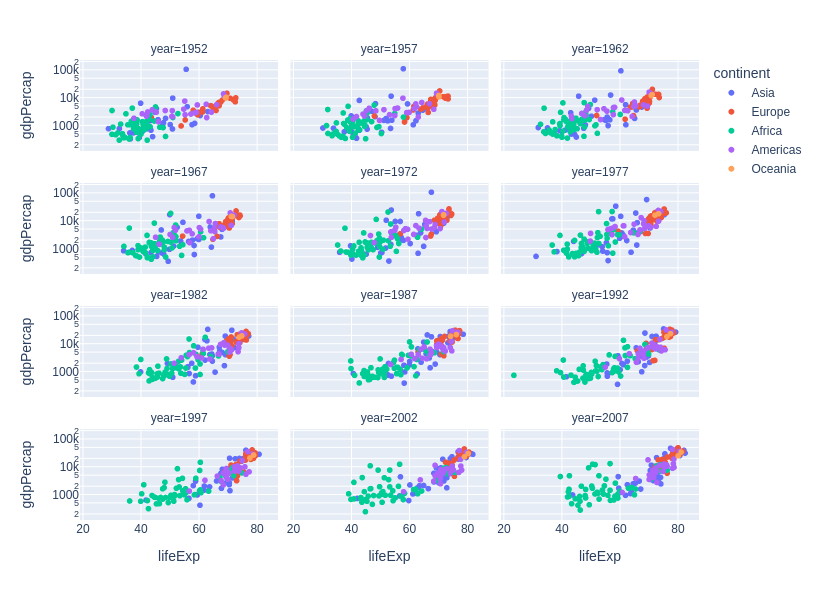

In [50]:
px.scatter(gap, x='lifeExp', y='gdpPercap', facet_col='year', facet_col_wrap=3, hover_name='country', color='continent', width=800, height=600, log_y=True)

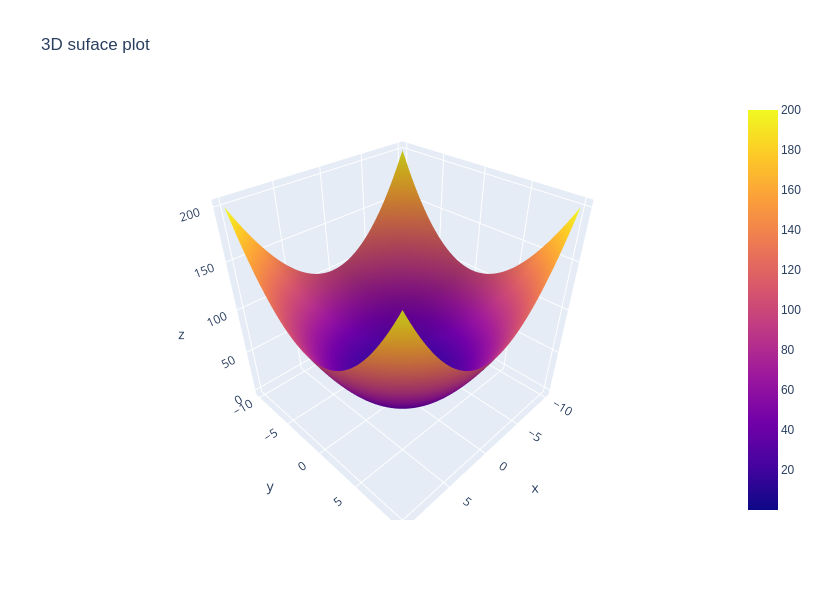

In [53]:
# 3D surface plot 
# can't be created using plotly express 
# we'll be using plotly go for this 

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x,y)
z = xx**2 + yy**2

trace = go.Surface(x=x, y=y, z=z)
data = [trace]

layout = go.Layout(title='3D suface plot', width=800, height=600)

fig = go.Figure(data, layout)
fig.show()

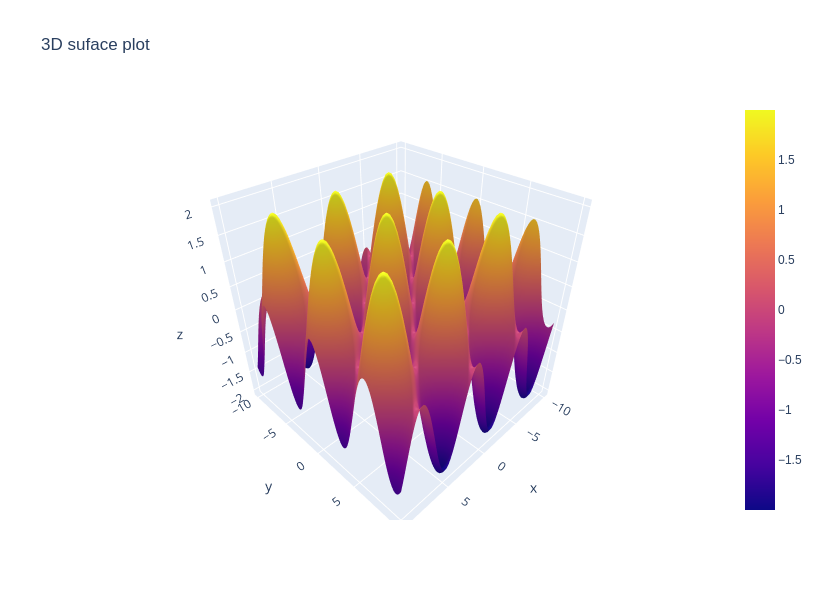

In [58]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x,y)
z = np.sin(xx) + np.cos(yy)

trace = go.Surface(x=x, y=y, z=z)
data = [trace]

layout = go.Layout(title='3D suface plot', width=800, height=600)

fig = go.Figure(data, layout)
fig.show()

/tmp/ipykernel_30019/1360640102.py:5: RuntimeWarning:

invalid value encountered in sqrt



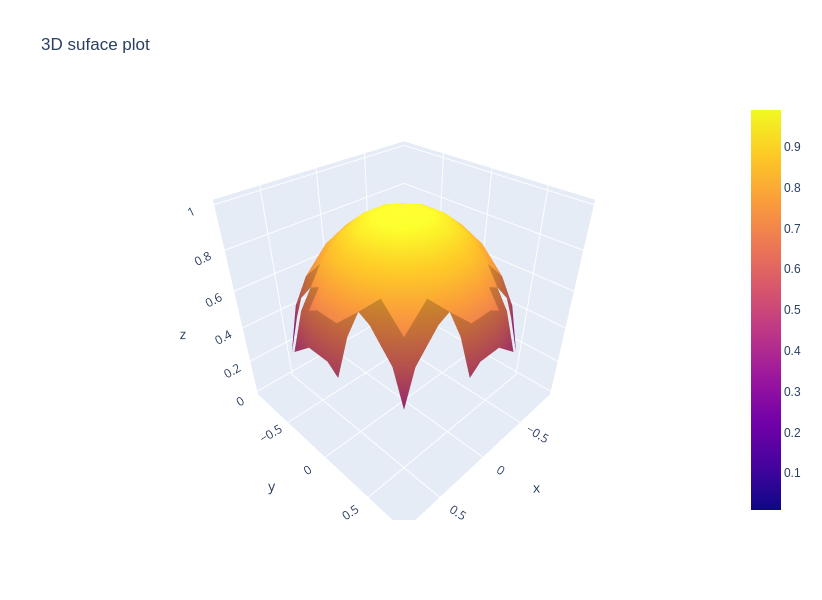

In [60]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x,y)
z = np.sqrt(1- xx**2 - yy**2)

trace = go.Surface(x=x, y=y, z=z)
data = [trace]

layout = go.Layout(title='3D suface plot', width=800, height=600)

fig = go.Figure(data, layout)
fig.show()

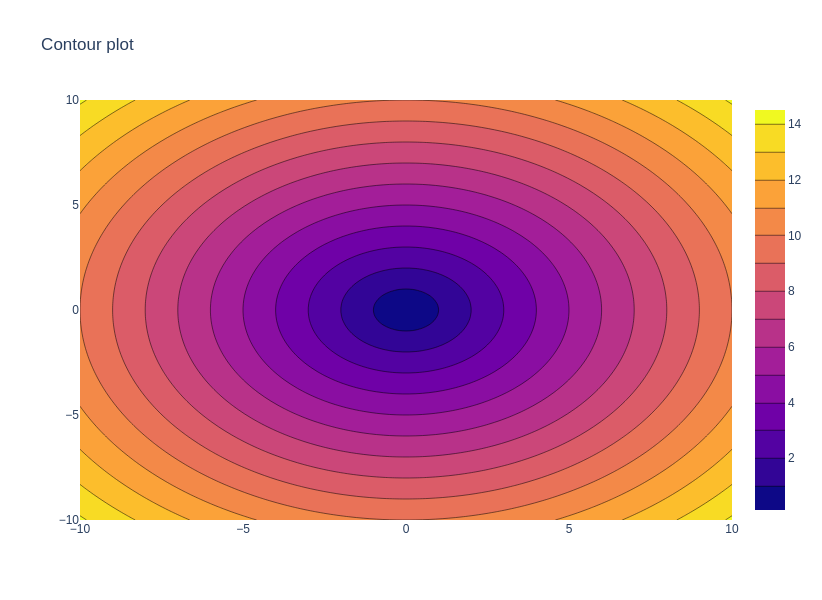

In [63]:
#  Contour Plot 
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x,y)
z = np.sqrt(xx**2 + yy**2)

trace = go.Contour(x=x, y=y, z=z)
data = [trace]

layout = go.Layout(title='Contour plot', width=800, height=600)

fig = go.Figure(data, layout)
fig.show()

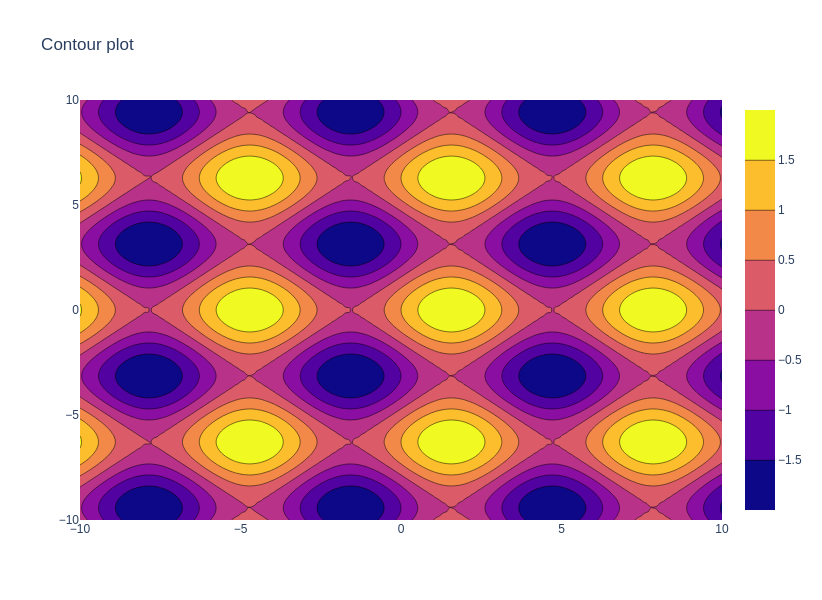

In [64]:
#  Contour Plot 
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x,y)
z = np.sin(xx) + np.cos(yy)

trace = go.Contour(x=x, y=y, z=z)
data = [trace]

layout = go.Layout(title='Contour plot', width=800, height=600)

fig = go.Figure(data, layout)
fig.show()

### Subplots 

In [74]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2)

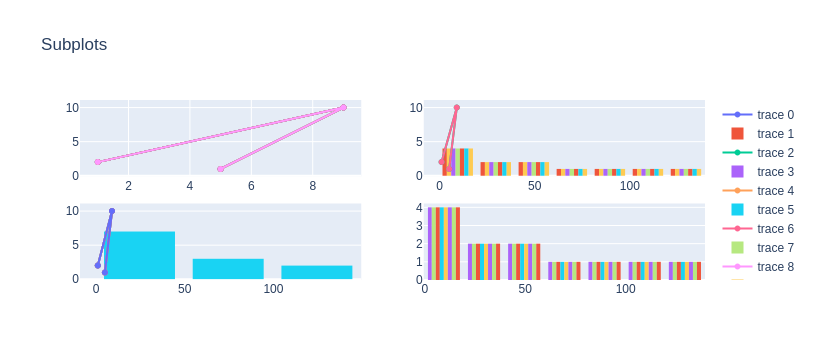

In [85]:
fig.add_trace(
    go.Scatter(x=[1,9,5], y=[2,10,1]),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(x=[1,9,5,22,100,134,56,78,12,45,34,93]),
    row = 1,
    col = 2
)

fig.add_trace(
    go.Scatter(x=[1,9,5], y=[2,10,1]),
    row = 2,
    col = 1
)

fig.add_trace(
    go.Histogram(x=[1,9,5,22,100,134,56,78,12,45,34,93]),
    row = 2,
    col = 2
)

fig.update_layout(title='Subplots')
fig.show()

# Non Sense 